<a href="https://colab.research.google.com/github/jakubpiwowarski/salary_2023/blob/main/Salary_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from math import sqrt
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('ds_salaries.csv')

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df.shape

(3755, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [ ]:
df['remote_ratio'] = df['remote_ratio'].astype(str)
df['remote_ratio'] = df['remote_ratio'].replace({
    '0': 'Office',
    '50': 'Hybrid',
    '100' : 'Remote',
})

In [ ]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"


df['job_category'] = df['job_title'].apply(assign_broader_category)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,Remote,ES,L,Other
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,Remote,US,S,Machine Learning
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,Remote,US,S,Machine Learning
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,Remote,CA,M,Data Science
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,Remote,CA,M,Data Science


In [ ]:
df.drop(['job_category'], axis=1, inplace=True)

In [ ]:
df.drop(['salary'], axis=1, inplace=True)

In [ ]:
df.drop(['salary_currency'], axis=1, inplace=True)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,Remote,ES,L
1,2023,MI,CT,ML Engineer,30000,US,Remote,US,S
2,2023,MI,CT,ML Engineer,25500,US,Remote,US,S
3,2023,SE,FT,Data Scientist,175000,CA,Remote,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,Remote,CA,M


Graphs and analysis:

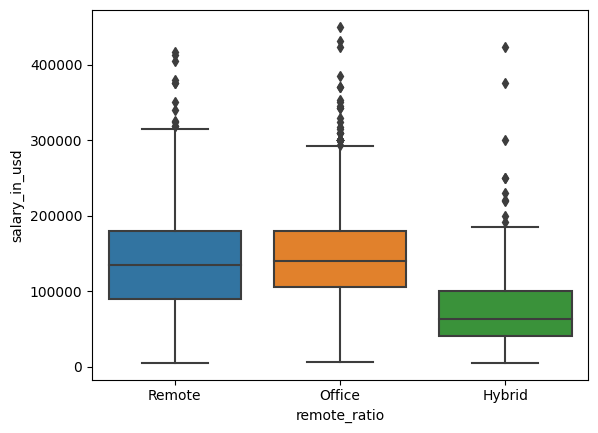

In [25]:
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.show()

In [33]:
fig = px.box(x=df["salary_in_usd"], y=df["job_title"])
fig.update_layout(title={'text': "Boxplot of Salary in USD for each Job Title",
                         'x': 0.48,  
                         'xanchor': 'center',  
                         'yanchor': 'top',
                         'font': {'size': 22}},
                  margin={'t': 100},
                  height=1600,
                  xaxis_title="Salary in USD",
                  yaxis_title="Job Title")
fig.show()

<Axes: xlabel='salary_in_usd', ylabel='Count'>

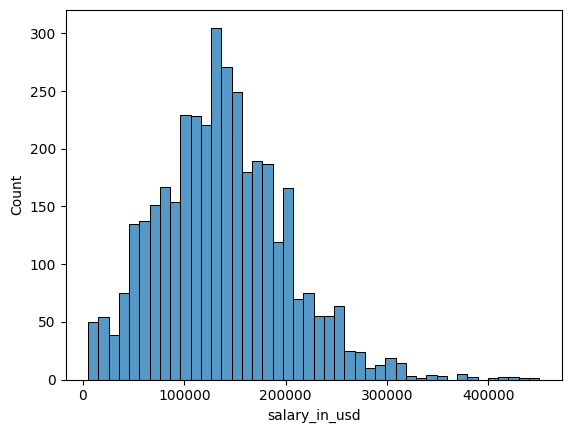

In [ ]:
sns.histplot(x='salary_in_usd', data=df)

In [ ]:
fig = px.histogram(df, x="employment_type", color="experience_level", barmode="group")
fig.update_layout(title={'text': "Employment Types by their Experience",
                         'x': 0.48,  
                         'xanchor': 'center',  
                         'yanchor': 'top',
                         'font': {'size': 22}},
                  margin={'t': 100},
                  xaxis_title="Employment Type")
fig.show()

In [24]:
job_title = df["job_title"].value_counts().reset_index().rename(columns={"index":"job_title", 
                                                                    "job_title":"count"})
fig = px.bar(job_title.head(20), y="job_title", x="count", color="job_title")
fig.update_layout(title={'text': "Distribution of Employee's Top 20 Job Titles",
                         'x': 0.48,  
                         'xanchor': 'center',  
                         'yanchor': 'top',
                         'font': {'size': 22}},
                  margin={'t': 100},
                  showlegend=False, 
                   
                  height=600)
fig.show()

In [34]:
df1 = df.copy()


In [35]:
df1.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,Remote,ES,L
1,2023,MI,CT,ML Engineer,30000,US,Remote,US,S
2,2023,MI,CT,ML Engineer,25500,US,Remote,US,S
3,2023,SE,FT,Data Scientist,175000,CA,Remote,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,Remote,CA,M


In [51]:
numerical = ['work_year', 'salary_in_usd']
categorical = ['experience_level', 'employment_type', 'job_title','employment_type', 'job_title',
'employee_residence', 'company_location', 'company_size', 'remote_ratio']

In [52]:
encoder = OneHotEncoder()
categorical_df=pd.DataFrame(encoder.fit_transform(df1[categorical]).toarray())

In [53]:
df_new=pd.concat((df1[numerical],categorical_df),axis=1)

In [54]:
df_new.columns=df_new.columns.astype(str)

In [55]:
scaler_=StandardScaler()
df_new=pd.DataFrame(scaler_.fit_transform(df_new),columns=df_new.columns)

In [57]:
X = df_new.drop(['salary_in_usd'], axis=1)
y = df_new['salary_in_usd']

In [66]:
seed = 100

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [62]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
pred=model.predict(X_test)
score=r2_score(y_test,pred)
err=mean_squared_error(y_test,pred)
rmse = sqrt(mean_squared_error(y_test, pred))


print('The value of r_2 score is:{}'.format(score))
print('The value of mean_squared_error comes out to be:{}'.format(err))
print('The value of root mean_squared_error comes out to be:{}'.format(rmse))

The value of r_2 score is:0.4263928098547537
The value of mean_squared_error comes out to be:0.5849451075957743
The value of root mean_squared_error comes out to be:0.7648170419098769


In [75]:
X_train.shape

(3004, 355)

In [89]:
def model1():
  model1 = models.Sequential()
  model1.add(layers.Dense(50, activation='relu', input_shape=X_train.shape[1:]))
  model1.add(layers.Dense(100, activation='relu'))
  model1.add(layers.Dense(100, activation='relu'))
  model1.add(layers.Dense(80, activation='relu'))
  model1.add(layers.Dense(50, activation='relu'))
  model1.add(layers.Dense(1, activation='relu'))
  model1.compile(optimizer='sgd', loss='mean_squared_error')
  return model1

In [90]:
model1 = model1()

In [91]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 50)                17800     
                                                                 
 dense_19 (Dense)            (None, 100)               5100      
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 80)                8080      
                                                                 
 dense_22 (Dense)            (None, 50)                4050      
                                                                 
 dense_23 (Dense)            (None, 1)                 51        
                                                                 
Total params: 45,181
Trainable params: 45,181
Non-trai

In [93]:
history = model1.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
94/94 [==============================] - 0s 4ms/step - loss: 0.7916 - val_loss: 0.8566
Epoch 2/20
94/94 [==============================] - 0s 4ms/step - loss: 0.7911 - val_loss: 0.8545
Epoch 3/20
94/94 [==============================] - 0s 4ms/step - loss: 0.7921 - val_loss: 0.8582
Epoch 4/20
94/94 [==============================] - 0s 3ms/step - loss: 0.7916 - val_loss: 0.8628
Epoch 5/20
94/94 [==============================] - 0s 3ms/step - loss: 0.7927 - val_loss: 0.8553
Epoch 6/20
94/94 [==============================] - 0s 3ms/step - loss: 0.7909 - val_loss: 0.8570
Epoch 7/20
94/94 [==============================] - 0s 4ms/step - loss: 0.7915 - val_loss: 0.8578
Epoch 8/20
94/94 [==============================] - 0s 3ms/step - loss: 0.7917 - val_loss: 0.8531
Epoch 9/20
94/94 [==============================] - 0s 4ms/step - loss: 0.7918 - val_loss: 0.8567
Epoch 10/20
94/94 [==============================] - 0s 2ms/step - loss: 0.7912 - val_loss: 0.8587
Epoch 11/20
94/94 [

In [94]:
model1.evaluate(X_test, y_test)

24/24 [==============================] - 0s 1ms/step - loss: 0.8557


0.8556683659553528

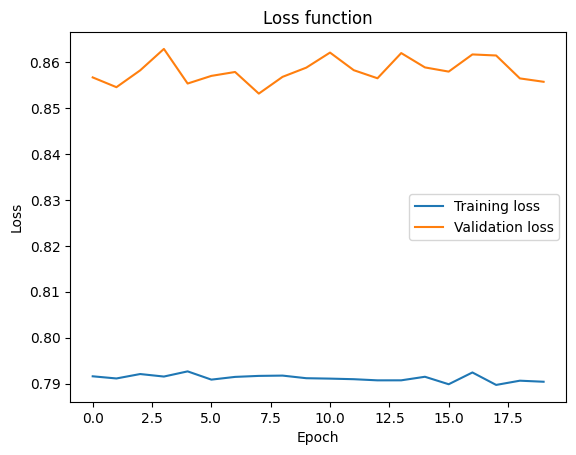

In [95]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()